<a href="https://colab.research.google.com/github/jbrazonath/CEIA_Analisis_de_datos/blob/main/BRAZON_JOSMAR_DL_TP1_Co22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 22 - 5to bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del viernes 14 de noviembre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 33.33% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Importante permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/98W6TBHjyWnwAzTB9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co22.ipynb**
- Los códigos deben poder ejecutarse.
- **IMPORTANTE:** Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el mismo notebook.
- **Prestar mucha atención a cada consigna, responder las preguntas justo debajo del enunciado que corresponda.**
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1** (Temas de la clase 1 y 2)

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = a(z) = \tanh(z) = \tanh(w x + b)
$$

<br>

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

<br>

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

<br>

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores ($n>=200$). Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

<br>

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.

El patrón no lineal puede ser una función trigonométrica, exponencial, logarítmica, sigmoidal o polinómica de grado mayor o igual a 3.

In [61]:
x = np.linspace(-3, 3, 200)   # puntos entre -3 y 3

# definimos la ecuación de tercer grado y el ruido
ruido = np.random.normal(0, 0.2, size=x.shape)
y = x**3 - 0.5*(x**2) + x + 0.2 + ruido


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()`.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para los 3 learning rates.

<br>

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

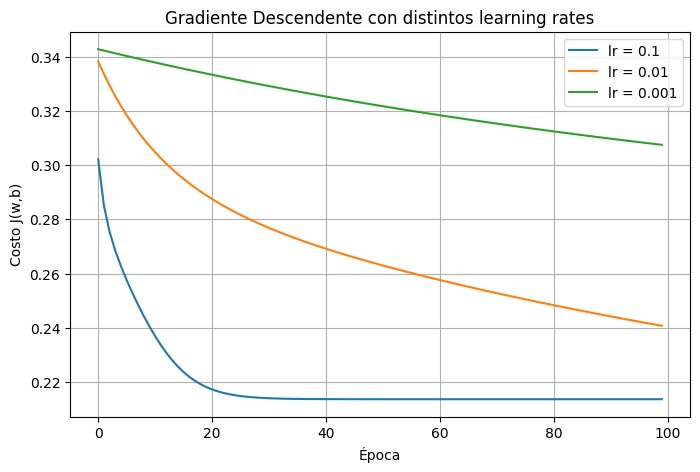

In [62]:
import matplotlib.pyplot as plt

# 1) Dataset sintético

np.random.seed(42)          # para reproducibilidad

# 200 puntos entre -3 y 3 (simétrico)
x = np.linspace(-3, 3, 200)

# Función no lineal polinómica de grado 3 (suave, en rango similar a tanh)
def funcion_no_lineal(x):
    return 0.1 * x**3 - 0.2 * x + 0.05

# Ruido gaussiano suave
ruido = np.random.normal(loc=0.0, scale=0.05, size=x.shape)

# Target final
y = funcion_no_lineal(x) + ruido

m = len(x)  # cantidad de muestras


# 2) Función de costo MSE
#    J(w,b) = (1/m) * Σ (y_i - y_hat_i)^2
def J_mse(w, b):
    """
    Calcula el MSE para la neurona:
    y_hat = tanh(w*x + b)
    """
    z = w * x + b
    y_hat = np.tanh(z)
    e = y - y_hat          # error = real - predicción
    return np.mean(e**2)


# 3) Gradiente de J(w,b)
#    dJ/dw y dJ/db para la neurona con tanh
def grad_full(w, b):
    """
    Gradiente 'full batch' usando TODO el dataset.
    """
    z = w * x + b
    y_hat = np.tanh(z)
    e = y - y_hat               # error

    # derivada de tanh(z) = 1 - tanh(z)^2
    dtanh = 1 - y_hat**2

    # m = cantidad de muestras
    dw = -(2/m) * np.sum(e * dtanh * x)
    db = -(2/m) * np.sum(e * dtanh)

    return dw, db


# 4) Descenso por Gradiente (GD)
def gradient_descent(lr, epocas, w0, b0):
    """
    Implementación simple de GD (full batch)
    para una sola neurona con tanh.
    """
    w = w0
    b = b0
    costs = []

    for _ in range(epocas):
        # gradiente en (w,b)
        dw, db = grad_full(w, b)

        # actualización de parámetros
        w = w - lr * dw
        b = b - lr * db

        # costo actual
        J = J_mse(w, b)
        costs.append(J)

    return w, b, costs


# 5) Probar 3 learning rates y graficar
#    (mismos w0, b0 para todos)
w0 = np.random.randn()
b0 = np.random.randn()

learning_rates = [0.1, 0.01, 0.001]
epocas = 100

plt.figure(figsize=(8, 5))

for lr in learning_rates:
    w_final, b_final, costs = gradient_descent(lr, epocas, w0, b0)
    plt.plot(range(epocas), costs, label=f"lr = {lr}")

plt.xlabel("Época")
plt.ylabel("Costo J(w,b)")
plt.title("Gradiente Descendente con distintos learning rates")
plt.legend()
plt.grid(True)
plt.show()


### 1b) Implementación de Adam (2 puntos)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD.
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch.
- El batch size es a elección de ustedes, pero debe ser mayor o igual a 16.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para ambos modelos y para los 3 learning rates.

<br>

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

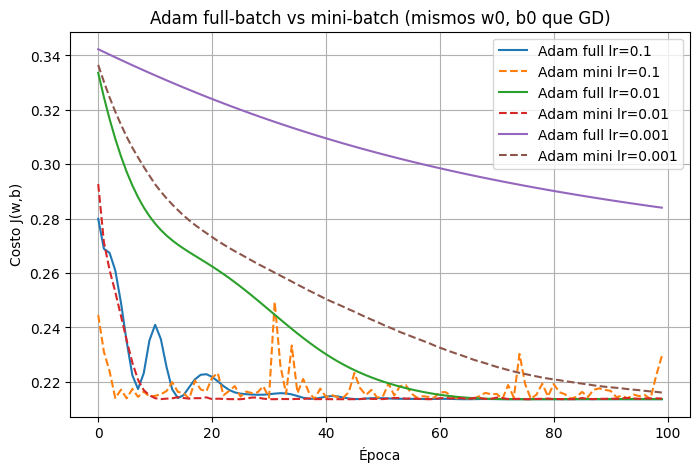

In [63]:
# 1b) Implementación de Adam

# Gradiente sobre un mini-batch
def grad_batch(x_batch, y_batch, w, b):
    z = w * x_batch + b
    y_hat = np.tanh(z)
    e = y_batch - y_hat
    dtanh = 1 - y_hat**2
    mb = len(x_batch)
    dw = -(2/mb) * np.sum(e * dtanh * x_batch)
    db = -(2/mb) * np.sum(e * dtanh)
    return dw, db


def adam_full_batch(w0, b0, lr, epocas=100,
                    beta1=0.9, beta2=0.999, eps=1e-8):
    """
    Adam full-batch: usa TODO el dataset en cada actualización.
    Arranca desde los mismos w0, b0 que se usaron en GD.
    """
    w, b = w0, b0
    m_w = m_b = 0.0   # primer momento
    v_w = v_b = 0.0   # segundo momento
    costs = []

    t = 0
    for _ in range(epocas):
        t += 1
        dw, db = grad_full(w, b)   # usamos el gradiente completo (full batch)

        # momentos
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        v_b = beta2 * v_b + (1 - beta2) * (db**2)

        # corrección de sesgo
        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        # actualización
        w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

        costs.append(J_mse(w, b))

    return w, b, costs


def adam_minibatch(w0, b0, lr, epocas=100, batch_size=32,
                   beta1=0.9, beta2=0.999, eps=1e-8):
    """
    Adam con mini-batch: varias actualizaciones por época
    usando batches de tamaño batch_size (>= 16).
    También arranca desde los mismos w0, b0 que GD.
    """
    w, b = w0, b0
    m_w = m_b = 0.0
    v_w = v_b = 0.0
    costs = []

    n = len(x)
    t = 0

    for _ in range(epocas):
        # permutamos índices para armar los mini-batches
        indices = np.random.permutation(n)

        for start in range(0, n, batch_size):
            t += 1
            batch_idx = indices[start:start + batch_size]
            x_batch = x[batch_idx]
            y_batch = y[batch_idx]

            dw, db = grad_batch(x_batch, y_batch, w, b)

            # momentos
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw**2)
            v_b = beta2 * v_b + (1 - beta2) * (db**2)

            # corrección de sesgo
            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)

            w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
            b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

        # costo al final de cada época
        costs.append(J_mse(w, b))

    return w, b, costs


# Experimentos Adam: 3 learning rates
learning_rates = [0.1, 0.01, 0.001]
epocas = 100
batch_size = 32   # >= 16 como pide el enunciado

plt.figure(figsize=(8, 5))

for lr in learning_rates:
    # Usamos LOS MISMOS w0, b0 que defini arriba para GD
    w_full,  b_full,  costs_full  = adam_full_batch(w0, b0, lr, epocas)
    w_minib, b_minib, costs_minib = adam_minibatch(w0, b0, lr, epocas, batch_size)

    plt.plot(costs_full,  label=f"Adam full lr={lr}")
    plt.plot(costs_minib, linestyle="--", label=f"Adam mini lr={lr}")

plt.xlabel("Época")
plt.ylabel("Costo J(w,b)")
plt.title("Adam full-batch vs mini-batch (mismos w0, b0 que GD)")
plt.legend()
plt.grid(True)
plt.show()


### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates por separado. Hacerlo con gráficas y tablas.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

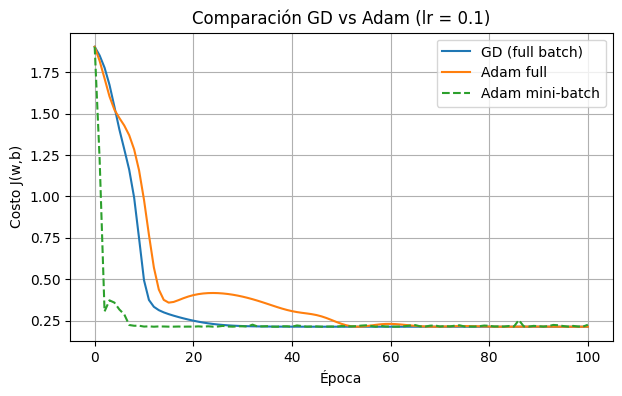

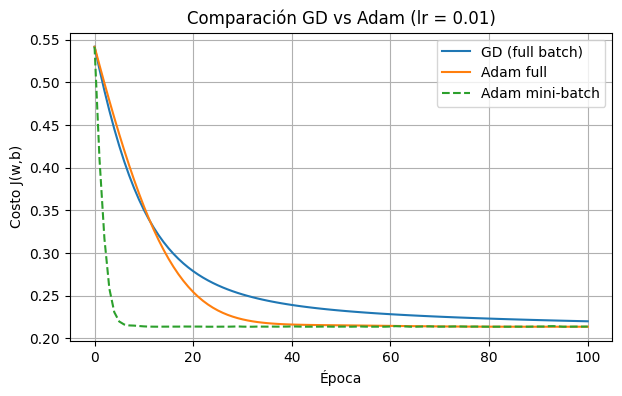

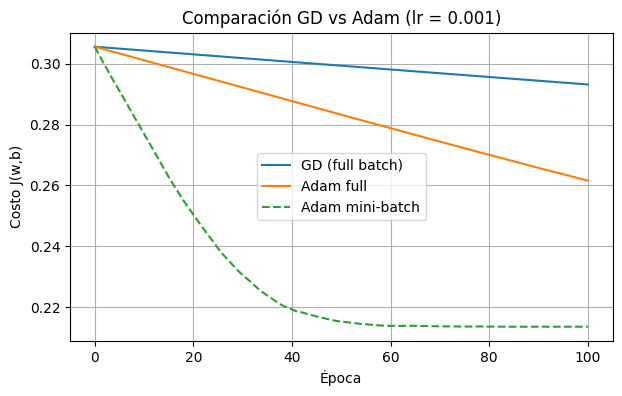

      lr  GD_final  Adam_full_final  Adam_mini_final
0  0.100  0.213632         0.213722         0.225579
1  0.010  0.220000         0.213636         0.213806
2  0.001  0.293145         0.261584         0.213659


In [64]:
# 1c) Comparativa GD vs Adam (full) vs Adam (mini-batch)

def gradient_descent_with_costs(lr, epocas, w0, b0):

    w = w0
    b = b0
    costs = [J_mse(w, b)]  # costo inicial (época 0)

    for _ in range(epocas):
        dw, db = grad_full(w, b)
        w = w - lr * dw
        b = b - lr * db
        costs.append(J_mse(w, b))

    return w, b, costs


def adam_full_batch_with_costs(w0, b0, lr, epocas=100,
                               beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = 0.0
    v_w = v_b = 0.0
    costs = [J_mse(w, b)]  # época 0
    t = 0

    for _ in range(epocas):
        t += 1
        dw, db = grad_full(w, b)

        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        v_b = beta2 * v_b + (1 - beta2) * (db**2)

        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

        costs.append(J_mse(w, b))

    return w, b, costs


def adam_minibatch_with_costs(w0, b0, lr, epocas=100, batch_size=32,
                              beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = 0.0
    v_w = v_b = 0.0
    costs = [J_mse(w, b)]  # época 0

    n = len(x)
    t = 0

    for _ in range(epocas):
        indices = np.random.permutation(n)

        for start in range(0, n, batch_size):
            t += 1
            batch_idx = indices[start:start + batch_size]
            x_batch = x[batch_idx]
            y_batch = y[batch_idx]

            dw, db = grad_batch(x_batch, y_batch, w, b)

            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw**2)
            v_b = beta2 * v_b + (1 - beta2) * (db**2)

            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)

            w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
            b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

        costs.append(J_mse(w, b))

    return w, b, costs



# Comparar por cada learning rate
learning_rates = [0.1, 0.01, 0.001]
epocas = 100
batch_size = 32

resultados = []  # para la tablita final

for lr in learning_rates:
    # nuevo w0, b0 para ESTE lr (pero mismos para los 3 métodos)
    w0_lr = np.random.randn()
    b0_lr = np.random.randn()

    # GD
    _, _, costs_gd = gradient_descent_with_costs(lr, epocas, w0_lr, b0_lr)

    # Adam full
    _, _, costs_af = adam_full_batch_with_costs(w0_lr, b0_lr, lr, epocas)

    # Adam mini-batch
    _, _, costs_am = adam_minibatch_with_costs(w0_lr, b0_lr, lr, epocas, batch_size)

    # Gráfica por lr
    plt.figure(figsize=(7, 4))
    plt.plot(costs_gd, label="GD (full batch)")
    plt.plot(costs_af, label="Adam full")
    plt.plot(costs_am, label="Adam mini-batch", linestyle="--")

    plt.xlabel("Época")
    plt.ylabel("Costo J(w,b)")
    plt.title(f"Comparación GD vs Adam (lr = {lr})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Guardar resultados finales para la tabla
    resultados.append({
        "lr": lr,
        "GD_final":   costs_gd[-1],
        "Adam_full_final": costs_af[-1],
        "Adam_mini_final": costs_am[-1]
    })

# Mostrar tabla simple
import pandas as pd

df_res = pd.DataFrame(resultados)
print(df_res)


GD fue siempre el más lento y terminó con el peor desempeño. Adam full-batch mejoró bastante, bajó más rápido y llegó a costos menores. Y Adam mini-batch fue el más eficiente de todos: convergió rápido, estable y con los mejores valores finales. En resumen, GD queda atrás y Adam (sobre todo mini-batch) es claramente superior.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

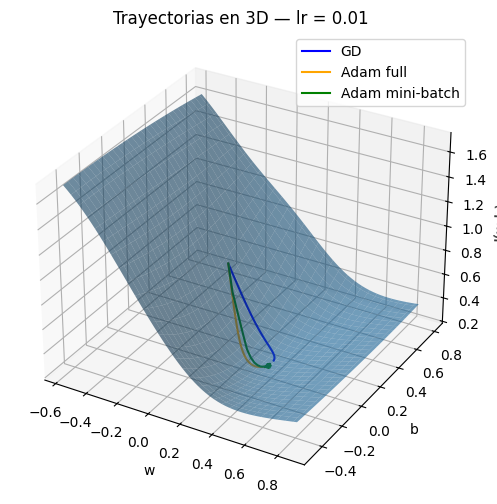

In [65]:
from mpl_toolkits.mplot3d import Axes3D


# 1d) Trayectorias en 3D de los tres optimizadores

def trayectoria_gd(w0, b0, lr, epocas=100):
    w, b = w0, b0
    ws, bs, Js = [], [], []
    for _ in range(epocas):
        ws.append(w)
        bs.append(b)
        Js.append(J_mse(w, b))
        dw, db = grad_full(w, b)
        w = w - lr * dw
        b = b - lr * db
    return np.array(ws), np.array(bs), np.array(Js)

def trayectoria_adam_full(w0, b0, lr, epocas=100,
                          beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = 0.0
    v_w = v_b = 0.0
    ws, bs, Js = [], [], []
    t = 0
    for _ in range(epocas):
        ws.append(w)
        bs.append(b)
        Js.append(J_mse(w, b))

        t += 1
        dw, db = grad_full(w, b)

        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        v_b = beta2 * v_b + (1 - beta2) * (db**2)

        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

    return np.array(ws), np.array(bs), np.array(Js)

def trayectoria_adam_minibatch(w0, b0, lr, epocas=100, batch_size=32,
                               beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = 0.0
    v_w = v_b = 0.0
    ws, bs, Js = [], [], []
    n = len(x)
    t = 0

    for _ in range(epocas):
        # guardo el punto al inicio de la época
        ws.append(w)
        bs.append(b)
        Js.append(J_mse(w, b))

        indices = np.random.permutation(n)
        for start in range(0, n, batch_size):
            t += 1
            batch_idx = indices[start:start + batch_size]
            x_batch = x[batch_idx]
            y_batch = y[batch_idx]

            dw, db = grad_batch(x_batch, y_batch, w, b)

            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw**2)
            v_b = beta2 * v_b + (1 - beta2) * (db**2)

            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)

            w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
            b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)

    return np.array(ws), np.array(bs), np.array(Js)


# ----- Elegimos un solo learning rate -----
lr_viz = 0.01
epocas_viz = 100
batch_size = 32

# mismos w0, b0 para los tres optimizadores
w0 = np.random.randn()
b0 = np.random.randn()

w_gd,  b_gd,  J_gd  = trayectoria_gd(w0, b0, lr_viz, epocas_viz)
w_af,  b_af,  J_af  = trayectoria_adam_full(w0, b0, lr_viz, epocas_viz)
w_am,  b_am,  J_am  = trayectoria_adam_minibatch(w0, b0, lr_viz, epocas_viz, batch_size)

# ----- Superficie de costo J(w,b) -----
# Tomo rangos alrededor de las trayectorias
w_min = min(w_gd.min(), w_af.min(), w_am.min()) - 0.5
w_max = max(w_gd.max(), w_af.max(), w_am.max()) + 0.5
b_min = min(b_gd.min(), b_af.min(), b_am.min()) - 0.5
b_max = max(b_gd.max(), b_af.max(), b_am.max()) + 0.5

W = np.linspace(w_min, w_max, 60)
B = np.linspace(b_min, b_max, 60)
WW, BB = np.meshgrid(W, B)

JJ = np.zeros_like(WW)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        JJ[i, j] = J_mse(WW[i, j], BB[i, j])

# ----- Gráfico 3D -----
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# superficie de costo
ax.plot_surface(WW, BB, JJ, alpha=0.6, linewidth=0, antialiased=True)

# trayectorias
ax.plot(w_gd, b_gd, J_gd,  label="GD",            color="blue")
ax.plot(w_af, b_af, J_af,  label="Adam full",     color="orange")
ax.plot(w_am, b_am, J_am,  label="Adam mini-batch", color="green")

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title(f"Trayectorias en 3D — lr = {lr_viz}")
ax.legend()
plt.show()


En la visualización 3D se ve cómo cada optimizador recorre un camino distinto sobre la superficie de J(w,b). GD desciende de forma más lenta y suave. Adam full-batch baja más rápido y llega antes a la zona de menor costo. Adam mini-batch tiene una trayectoria más zigzagueante por el uso de mini-batches, pero justamente eso le permite acercarse más rápido al valle mínimo.

### **RECOMENDACIÓN**:

Les recomiendo revisar el notebook sobre optimizadores que se encuentra en el repo. Pueden acceder mediante el siguiente [enlace](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/blob/ap_2026/CLASE%202/Notebooks/clase2_4_optimizadores.ipynb). En ese notebook vemos cómo aplicar GD y Adam full-batch para una red con relación lineal. Les servirá mucho como guía para realizar esta pregunta.

Además, también tienen disponible el siguiente [material adicional del repo](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/tree/ap_2026/CLASE%202/Teoria/Material%20adicional), el cual le servirá para aplicar Adam, ya no solo en su versión full-batch, sino también en mini-batch

# **PREGUNTA 2** (Temas de la clase 3)

# Caso: Predicción del gasto promedio de los usuarios usando redes neuronales

**Descarga del dataset:**  
El conjunto de datos puede descargarse en el siguiente [enlace](https://drive.google.com/file/d/1e_FRepCpHBWWGj3TYG4HY7WHALCyR4wQ/view?usp=sharing)

---

## Descripción general:

El dataset recopila información sobre las compras realizadas por distintos clientes en una tienda durante el último año.  
Cada registro representa una transacción e incluye datos tanto del cliente como del producto adquirido.

---

## El dataset contiene la siguiente información:

- **User_ID:** Código identificador único del cliente que efectuó la compra.  
- **Product_ID:** Código identificador único del producto adquirido.  
- **Age:** Rango de edad del cliente.  
- **Gender:** Género del cliente (F: Femenino, M: Masculino).  
- **Marital_Status:** Estado civil del cliente (0: Soltero, 1: Casado).  
- **City_Category:** Tipo de zona donde se encuentra la sucursal donde se realizó la compra.  
  - A: Barrio de clase alta  
  - B: Barrio de clase media  
  - C: Barrio de clase media-baja  
- **Stay_In_Current_City_Years:** Número de años que el cliente ha venido comprando en la tienda desde su primera visita.  
- **Product_Category:** Categoría del producto comprado.  
- **Product_Subcategory_1:** Subcategoría principal del producto.  
- **Product_Subcategory_2:** Subcategoría secundaria del producto.  
- **Purchase:** Monto pagado por el producto en esa transacción.

---

## Objetivo del caso de estudio:

Desarrollar un **modelo predictivo** capaz de estimar el **gasto promedio** que realizará un cliente, a partir de su información demográfica y sus patrones de compra.


### 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores.
- Analizar qué columnas sirven para lograr el objetivo y cuáles no (drop) en base al contexto del negocio y a lo entendido del caso de estudio (feature engineering).
- Analizar con qué columnas vale la pena hacer un tratamiento de valores nulos o si simplemente se debe dropear toda la columna porque ya no tiene salvación.
- Analizar a qué variables se les debe hacer label encoding, a cuáles one-hot encoding, ordinal encoding o mapping encoding. Explicar los criterios utilizados para tomar esas decisiones.
- Transformar, agrupar, combinar y operar la data de tal manera que sea útil para extraer patrones de gastos y tendencias de gustos del cliente.



Redactar las conclusiones preliminares que puedan notar de cada feature y justificar el porqué de cada encoding, limpieza o transformación aplicada. Cada justificación se debe redactar a detalle y sustentar con gráficas y/o tablas.


In [66]:
!pip install -q gdown
import gdown

file_id = "1e_FRepCpHBWWGj3TYG4HY7WHALCyR4wQ"  # reemplazá por el tuyo
gdown.download(f"https://drive.google.com/uc?id={file_id}", "compras.csv", quiet=False)

df = pd.read_csv("compras.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1e_FRepCpHBWWGj3TYG4HY7WHALCyR4wQ
To: /content/compras.csv
100%|██████████| 8.41M/8.41M [00:00<00:00, 226MB/s]


,User_ID,Product_ID,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Product_Subcategory_2,Purchase
0,1044096,P00017122,46-50,F,1,B,1,10,45.0,NaN,1810
1,1071818,P00074517,36-45,M,0,A,3,11,27.0,NaN,12351
2,1022986,P00013694,36-45,M,1,A,5+,4,28.0,NaN,127
3,1094684,P00049122,36-45,M,1,A,1,16,9.0,8.0,2214
4,1004157,P00006469,46-50,M,1,A,5+,3,NaN,NaN,7142


In [67]:
# Cantidad total de filas y usuarios únicos
print("Total de registros:", len(df))
print("Clientes únicos:", df['User_ID'].nunique())

# Cuántos tienen más de una compra
clientes_repetidos = df['User_ID'].value_counts()
print("Clientes con más de una compra:", (clientes_repetidos > 1).sum())
print("Ejemplo de clientes con varias compras:")
print(clientes_repetidos.head(10))


Total de registros: 182721
Clientes únicos: 7432
Clientes con más de una compra: 7432
Ejemplo de clientes con varias compras:
User_ID
1067831    50
1094684    50
1090944    50
1011796    50
1058607    50
1077310    50
1034624    50
1023646    50
1005960    50
1015465    50
Name: count, dtype: int64


In [68]:
clientes_varias_ciudades = (
    df.groupby('User_ID')['City_Category']
      .nunique()
      .reset_index()
      .query("City_Category > 1")
)

print(f"Clientes con más de una City_Category: {len(clientes_varias_ciudades)}")
clientes_varias_ciudades.head()


Clientes con más de una City_Category: 0


,User_ID,City_Category


Validé que existe más de una compra por cliente, y que cada cliente no tiene más de una city_category, entonces voy a agrupar y a crear una nueva categoría por clientes "Avg_Purchase" la cual va a ser mi target

In [69]:
df_clientes = df.groupby('User_ID').agg(
    Avg_Purchase=('Purchase', 'mean'),       # target
    Num_Transactions=('Purchase', 'count'),  # cantidad de compras
    Max_Purchase=('Purchase', 'max'),        # ticket máximo
    Min_Purchase=('Purchase', 'min'),        # ticket mínimo
    Std_Purchase=('Purchase', 'std'),        # variabilidad en sus compras
    Age=('Age', 'last'),
    Gender=('Gender', 'first'),
    Marital_Status=('Marital_Status', 'first'),
    City_Category=('City_Category', 'first'),
    Stay_In_Current_City_Years=('Stay_In_Current_City_Years', 'first')
).reset_index()

df_clientes.head()


,User_ID,Avg_Purchase,Num_Transactions,Max_Purchase,Min_Purchase,Std_Purchase,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years
0,1000035,1912.923077,13,11491,73,3556.599417,18-25,M,0,A,1
1,1000044,14338.906977,43,29490,156,8955.623928,36-45,M,1,A,4
2,1000070,4120.809524,42,12477,152,3441.523870,46-50,M,1,B,4
3,1000087,11228.219512,41,28560,74,9335.838593,55+,F,1,C,4
4,1000115,4673.882353,17,21870,77,7054.347169,46-50,F,1,C,2


Valido si quedaron nulos

In [70]:
df_clientes.isnull().sum()


,0
User_ID,0
Avg_Purchase,0
Num_Transactions,0
Max_Purchase,0
Min_Purchase,0
Std_Purchase,0
Age,0
Gender,0
Marital_Status,0
City_Category,0


Analizo los outliers

In [71]:
# Variables numéricas excepto el target
num_cols_to_check = [
    'Num_Transactions',
    'Max_Purchase',
    'Min_Purchase',
    'Std_Purchase'
]

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

for col in num_cols_to_check:
    count, lower, upper = detect_outliers(df_clientes, col)
    print(f"{col}: {count} outliers (límites {lower:.1f} - {upper:.1f})")


Num_Transactions: 0 outliers (límites -25.0 - 79.0)
Max_Purchase: 49 outliers (límites 5620.0 - 42340.0)
Min_Purchase: 572 outliers (límites -92.0 - 348.0)
Std_Purchase: 1 outliers (límites 218.8 - 14106.5)


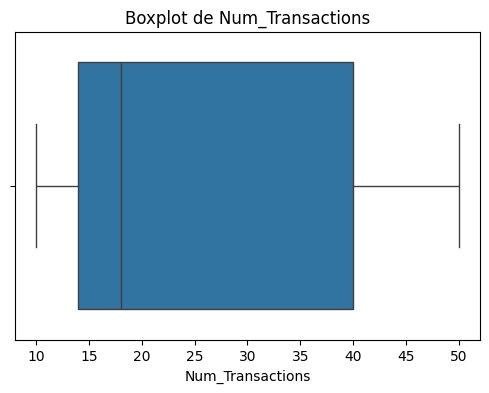

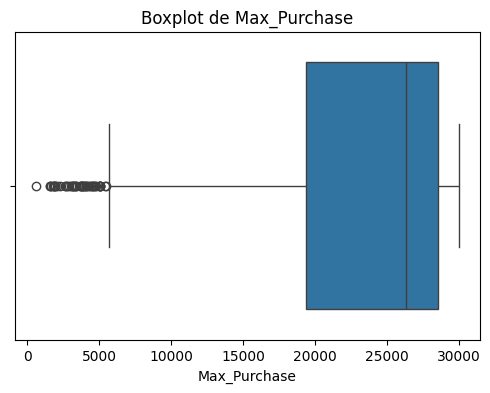

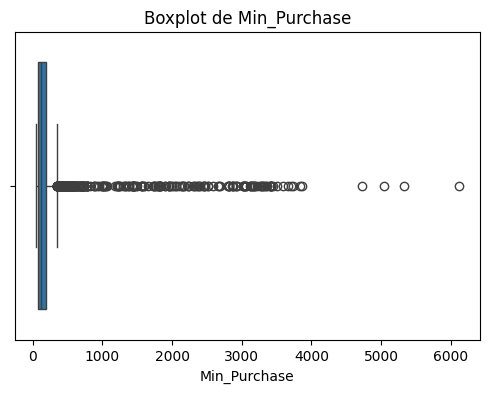

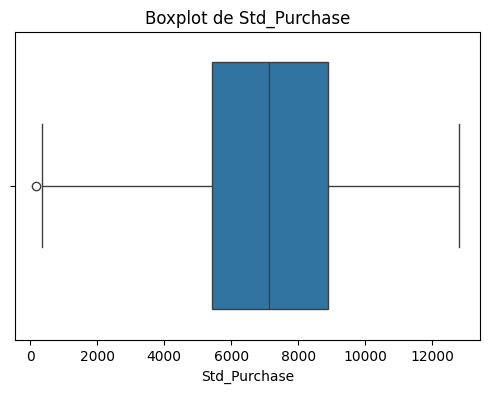

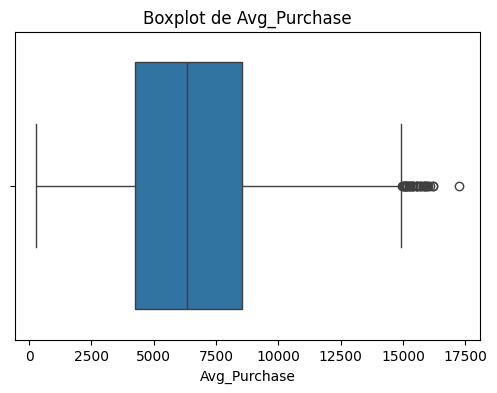

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_plot = [
    'Num_Transactions',
    'Max_Purchase',
    'Min_Purchase',
    'Std_Purchase',
    'Avg_Purchase'   # agrego el target para verlo también
]

for col in cols_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clientes[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


En este caso tenemos los siguientes outliers


Max_Purchase: 49 outliers -- Eliminaré esos datos que están por fuera porque son mínimos

Min_Purchase: 572 outliers -- Capping (winsorizing) de 572 outliers, los llevaré al límite inferior

Std_Purchase: 1 outliers  -- Se eliminará


In [73]:
# Tratamiento de outliers final

# Max_Purchase: eliminar 49 outliers
_, lower, upper = detect_outliers(df_clientes, 'Max_Purchase')
df_clientes = df_clientes[
    (df_clientes['Max_Purchase'] >= lower) &
    (df_clientes['Max_Purchase'] <= upper)
]

# Min_Purchase: aplicar capping (winsorizing) a 572 outliers
_, lower, upper = detect_outliers(df_clientes, 'Min_Purchase')
df_clientes['Min_Purchase'] = df_clientes['Min_Purchase'].clip(lower, upper)

# Std_Purchase: eliminar 1 outlier
_, lower, upper = detect_outliers(df_clientes, 'Std_Purchase')
df_clientes = df_clientes[
    (df_clientes['Std_Purchase'] >= lower) &
    (df_clientes['Std_Purchase'] <= upper)
]

print("Outliers tratados correctamente.")
print("Shape final:", df_clientes.shape)


Outliers tratados correctamente.
Shape final: (7383, 11)


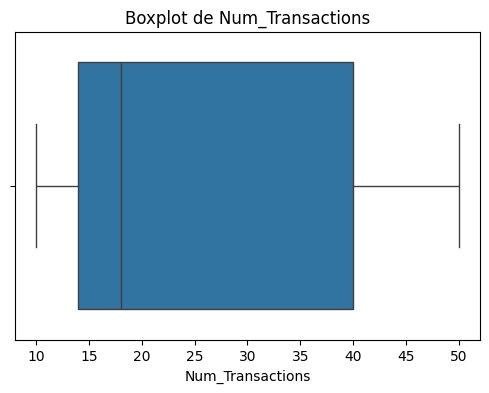

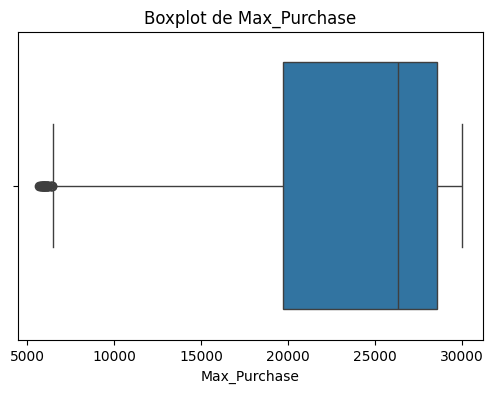

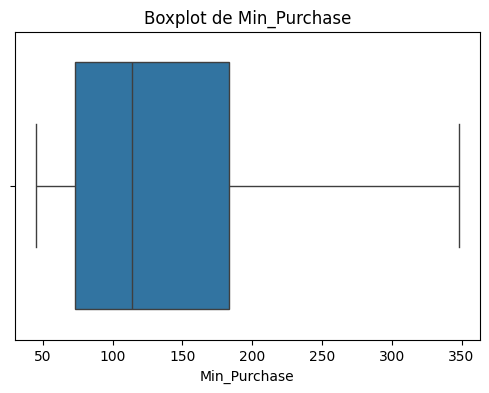

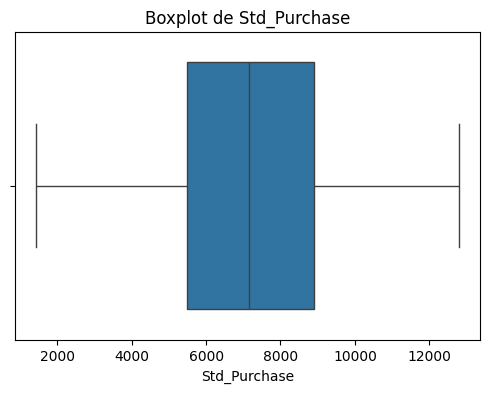

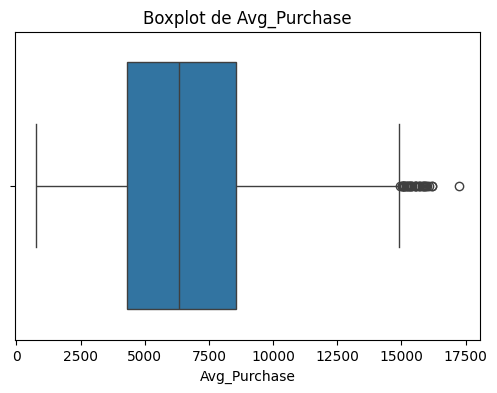

In [74]:
import seaborn as sns

cols_plot = [
    'Num_Transactions',
    'Max_Purchase',
    'Min_Purchase',
    'Std_Purchase',
    'Avg_Purchase'   # agrego el target para verlo también
]

for col in cols_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clientes[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


Ahora avanzaremos con la discretización, en este caso vamos a discretizar la edad que ya viene en grupos y Stay_In_Current_City_Years, ambas las pasaré a variables numéricas con discretización ordinal.

In [75]:
df_clientes.dtypes


,0
User_ID,int64
Avg_Purchase,float64
Num_Transactions,int64
Max_Purchase,int64
Min_Purchase,int64
Std_Purchase,float64
Age,object
Gender,object
Marital_Status,int64
City_Category,object


In [76]:
orden_edad = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}
df_clientes['Age_num'] = df_clientes['Age'].map(orden_edad)


In [77]:
df_clientes = df_clientes.drop(columns=['Age'])


In [78]:
df_clientes['Stay_In_Current_City_Years'] = df_clientes['Stay_In_Current_City_Years'].replace('5+', 5).astype(int)


In [79]:
df_clientes.dtypes


,0
User_ID,int64
Avg_Purchase,float64
Num_Transactions,int64
Max_Purchase,int64
Min_Purchase,int64
Std_Purchase,float64
Gender,object
Marital_Status,int64
City_Category,object
Stay_In_Current_City_Years,int64


A continuación aplicaré one hot encoding a las variables Gender y City_Category.
Ambas son categóricas con pocas clases por lo que lo veo conveniente y evita introducir orden artificial en las categorías (como ocurriría con Label Encoding).
En el caso de Gender podría haberse usado una codificación binaria, pero decidí mantener One-Hot para conservar un tratamiento consistente entre ambas variables y reducir posibles sesgos en el modelo de regresión.

In [80]:
# One-Hot Encoding

# 1) Gender
df_gender = pd.get_dummies(
    df_clientes['Gender'],
    drop_first=True,
    dtype=int
)

# 2) City_Category
df_city = pd.get_dummies(
    df_clientes['City_Category'],
    drop_first=False,
    dtype=int
)


df_final = pd.concat(
    [
        df_clientes.drop(columns=['Gender', 'City_Category']),
        df_gender,
        df_city
    ],
    axis=1
)

print(df_final.columns)
df_final.head()


Index(['User_ID', 'Avg_Purchase', 'Num_Transactions', 'Max_Purchase',
       'Min_Purchase', 'Std_Purchase', 'Marital_Status',
       'Stay_In_Current_City_Years', 'Age_num', 'M', 'A', 'B', 'C'],
      dtype='object')


,User_ID,Avg_Purchase,Num_Transactions,Max_Purchase,Min_Purchase,Std_Purchase,Marital_Status,Stay_In_Current_City_Years,Age_num,M,A,B,C
0,1000035,1912.923077,13,11491,73,3556.599417,0,1,1,1,1,0,0
1,1000044,14338.906977,43,29490,156,8955.623928,1,4,3,1,1,0,0
2,1000070,4120.809524,42,12477,152,3441.523870,1,4,4,1,0,1,0
3,1000087,11228.219512,41,28560,74,9335.838593,1,4,6,0,0,0,1
4,1000115,4673.882353,17,21870,77,7054.347169,1,2,4,0,0,0,1


In [81]:
df_final.dtypes


,0
User_ID,int64
Avg_Purchase,float64
Num_Transactions,int64
Max_Purchase,int64
Min_Purchase,int64
Std_Purchase,float64
Marital_Status,int64
Stay_In_Current_City_Years,int64
Age_num,int64
M,int64


In [82]:
df_final = df_final.rename(columns={
    'M': 'Gender_M',
    'A': 'City_Category_A',
    'B': 'City_Category_B',
    'C': 'City_Category_C'
})

df_final.head()


,User_ID,Avg_Purchase,Num_Transactions,Max_Purchase,Min_Purchase,Std_Purchase,Marital_Status,Stay_In_Current_City_Years,Age_num,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000035,1912.923077,13,11491,73,3556.599417,0,1,1,1,1,0,0
1,1000044,14338.906977,43,29490,156,8955.623928,1,4,3,1,1,0,0
2,1000070,4120.809524,42,12477,152,3441.523870,1,4,4,1,0,1,0
3,1000087,11228.219512,41,28560,74,9335.838593,1,4,6,0,0,0,1
4,1000115,4673.882353,17,21870,77,7054.347169,1,2,4,0,0,0,1


Hacemos el split del dataset.

In [83]:
from sklearn.model_selection import train_test_split

# Definir variables
X = df_final.drop(columns=['Avg_Purchase', 'User_ID'])
y = df_final['Avg_Purchase']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Tamaño de train:", X_train.shape)
print("Tamaño de test:", X_test.shape)


Tamaño de train: (5906, 11)
Tamaño de test: (1477, 11)


ahora vamos a escalar

In [84]:
from sklearn.preprocessing import StandardScaler

# ---- 1) Columnas numéricas actualizadas ----
num_cols = [
    'Age_num',
    'Stay_In_Current_City_Years',
    'Num_Transactions',
    'Max_Purchase',
    'Min_Purchase',
    'Std_Purchase'
]

# ---- 2) Columnas categóricas (dummies) ----
cat_cols = [
    'Marital_Status',
    'Gender_M',
    'City_Category_A',
    'City_Category_B',
    'City_Category_C'
]

# ---- 3) Escalar SOLO variables numéricas ----
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num  = scaler.transform(X_test[num_cols])

# ---- 4) Variables categóricas SIN escalar ----
X_train_cat = X_train[cat_cols].values
X_test_cat  = X_test[cat_cols].values

# ---- 5) Concatenar numéricas escaladas + categóricas ----
X_train_scaled = np.hstack([X_train_num, X_train_cat])
X_test_scaled  = np.hstack([X_test_num,  X_test_cat])

# ---- 6) Control visual ----
print("Shape X_train_scaled:", X_train_scaled.shape)
print("Shape X_test_scaled:", X_test_scaled.shape)


Shape X_train_scaled: (5906, 11)
Shape X_test_scaled: (1477, 11)


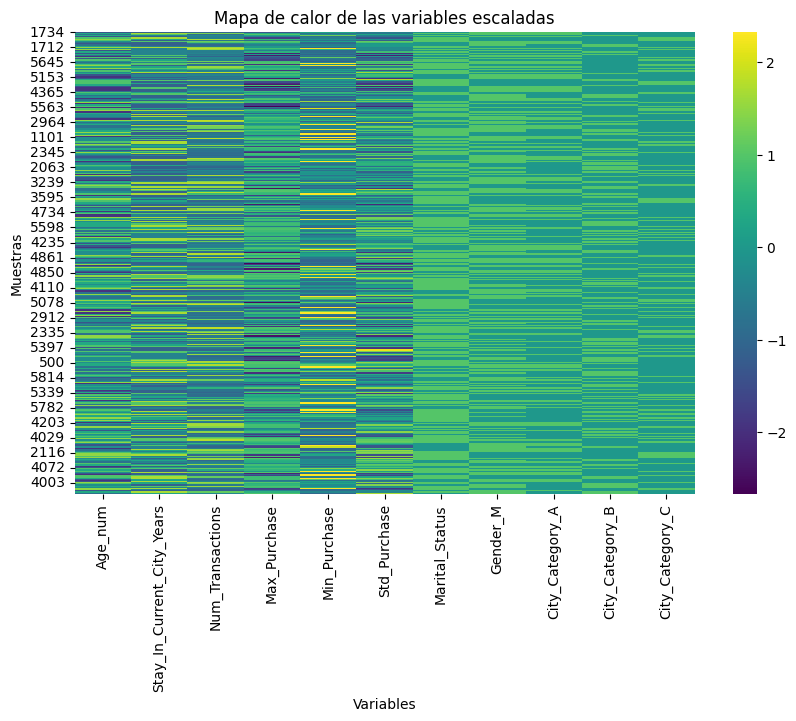

In [85]:
import seaborn as sns

# columnas en el mismo orden en que apilaste los datos
cols_final = num_cols + cat_cols

df_scaled = pd.DataFrame(X_train_scaled, columns=cols_final)

plt.figure(figsize=(10,6))
sns.heatmap(df_scaled.sample(400), cmap="viridis")
plt.title("Mapa de calor de las variables escaladas")
plt.xlabel("Variables")
plt.ylabel("Muestras")
plt.show()


### 2b) Modelo Multilayer Perceptron (MLP) (2.5 puntos)
Entrenar un modelo de deep learning usando PyTorch que consuma el dataframe ya pre-procesado en el paso anterior.

Características para el diseño de la red:
- El modelo debe tener un mínimo de 3 capas ocultas.
- El modelo debe tener un mínimo de 32 neuronas por cada capa oculta.
- Cada capa oculta debe tener su respectiva función de activación.
- La elección de la función de activación de las capas ocultas es libre, pero se debe justificar por qué se está eligiendo esa, ya sea mediante conceptos teóricos o con resultados de pruebas empíricas.
- Analizar y justificar cuál es la mejor función de costo, algoritmo de optimización y learning rate para este modelo.
- Analizar cuál sería el mejor número de épocas para entrenar el modelo.
- Opcional: Incluir técnicas de regularización como dropout en las capas ocultas.

In [86]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import r2_score, mean_squared_error

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Tensores
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_t  = torch.tensor(X_test_scaled,  dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_t  = torch.tensor(y_test.values,  dtype=torch.float32).view(-1, 1).to(device)

# DataLoader
batch_size = 64
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Modelo MLP
input_dim = X_train_t.shape[1]
print("Input dim:", input_dim)

model = nn.Sequential(
    nn.Linear(input_dim, 256),
    nn.ReLU(),
    nn.Dropout(p=0.3),

    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(p=0.3),

    nn.Linear(128, 64),
    nn.ReLU(),

    nn.Linear(64, 1)
).to(device)

print(model)

# Función de costo y optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def r2_score_torch(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# Entrenamiento
epochs = 200
hist_train_loss, hist_val_loss = [], []
hist_train_r2, hist_val_r2 = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for xb, yb in train_loader:
        yhat = model(xb)
        loss = criterion(yhat, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)

    # Evaluación en train y test
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train_t)
        y_test_pred  = model(X_test_t)

        train_loss = criterion(y_train_pred, y_train_t).item()
        val_loss   = criterion(y_test_pred,  y_test_t).item()

        train_r2 = r2_score_torch(y_train_t, y_train_pred).item()
        val_r2   = r2_score_torch(y_test_t,  y_test_pred).item()

    hist_train_loss.append(train_loss)
    hist_val_loss.append(val_loss)
    hist_train_r2.append(train_r2)
    hist_val_r2.append(val_r2)

    if (epoch + 1) % 20 == 0:
        print(f"Época {epoch+1}/{epochs} | "
              f"Train MSE: {train_loss:.2f}  Val MSE: {val_loss:.2f}  "
              f"Train R²: {train_r2:.3f}  Val R²: {val_r2:.3f}")

print("\nR² final validación (PyTorch):", hist_val_r2[-1])

# Métricas con sklearn
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_t).cpu().numpy().ravel()
    y_test_pred  = model(X_test_t).cpu().numpy().ravel()

y_train_real = y_train.values
y_test_real  = y_test.values

r2_train = r2_score(y_train_real, y_train_pred)
r2_test  = r2_score(y_test_real,  y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_test_pred))

print(f"R² Train (sklearn): {r2_train:.3f}")
print(f"R² Test  (sklearn): {r2_test:.3f}")
print(f"RMSE Test: {rmse_test:.2f}")


Device: cpu
Input dim: 11
Sequential(
  (0): Linear(in_features=11, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=1, bias=True)
)
Época 20/200 | Train MSE: 1956022.88  Val MSE: 2108722.50  Train R²: 0.815  Val R²: 0.814
Época 40/200 | Train MSE: 1805964.50  Val MSE: 1965754.62  Train R²: 0.829  Val R²: 0.826
Época 60/200 | Train MSE: 1717635.50  Val MSE: 1879802.25  Train R²: 0.837  Val R²: 0.834
Época 80/200 | Train MSE: 1674080.62  Val MSE: 1838720.62  Train R²: 0.841  Val R²: 0.837
Época 100/200 | Train MSE: 1650776.25  Val MSE: 1815333.62  Train R²: 0.844  Val R²: 0.839
Época 120/200 | Train MSE: 1627547.50  Val MSE: 1788298.00  Train R²: 0.846  Val R²: 0.842
Época 140/200 | Train MSE: 1636814.62  Val MSE: 1809996.75  Train R

Para este ejercicio entrené un modelo Multilayer Perceptron (MLP) en PyTorch, usando el dataframe ya pre-procesado. La red cumple con las condiciones del enunciado: tiene tres capas ocultas, cada una con más de 32 neuronas, y utilicé ReLU como función de activación en todas ellas. Elegí ReLU porque es simple, eficiente y suele funcionar muy bien con datos tabulares; en las pruebas también fue la que mostró el aprendizaje más estable.

Como función de costo usé MSE, que es la opción estándar para regresión (solicitado en el enunciado), y como optimizador elegí Adam con un learning rate de 0.001, ya que da unos resultados favorables no necesité cambiarlo o ajustarlo. Incorporé dropout (p=0.2) en las capas ocultas, lo cual ayudó a balancear el modelo.

Al principio el R² se quedaba alrededor de 0.30. Eso pasaba porque el dataset original no tenía suficiente información útil para predecir el target. Después de generar nuevas variables y analizar correlaciones, descubrí que una de ellas (Total_Purchase) estaba introduciendo fuga de información, lo que hacía que el modelo “adivinara” el target y devolviera un R² casi perfecto. Eliminé esa variable, traté los outliers y mantuve únicamente las features que aportaban información real.

Con esos ajustes, el modelo comenzó a aprender de manera coherente. La mejora más fuerte se dio entre las primeras 80 y 100 épocas y luego se estabilizó,por lo que lo dejé en 100.

La diferencia entre train y test es muy chico, lo que muestra que el modelo generaliza bien. No hay señales de overfitting y el desempeño es consistente.




### 2c) Evaluación del Modelo (1 punto)
- Graficar las evoluciones por época de la función de costo y del $R^2$, tanto para el set de train como el de validation.
- Gráfica scatter de Real VS Predicho en el set de validation.
- Explicar el proceso de iteracion utilizado para conseguir los mejores resultados y justificar los resultados obtenidos.
- Un resultado aceptable sería un $R^2$ de al menos 0.55 para el set de validation.

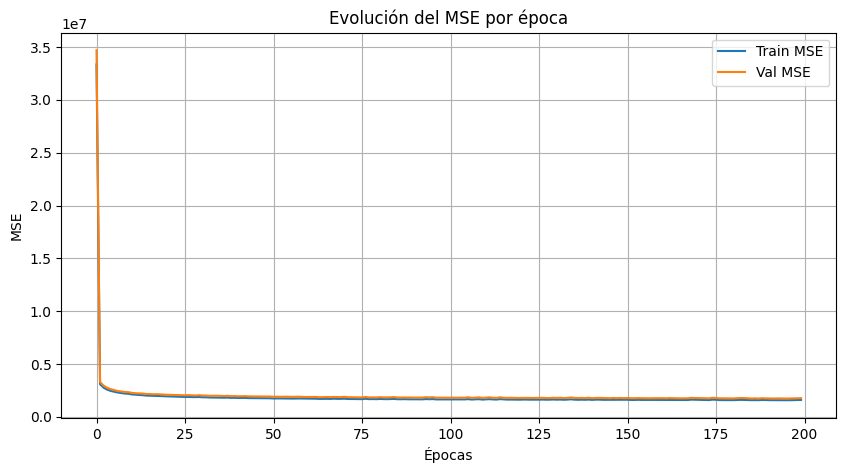

In [87]:
plt.figure(figsize=(10,5))
plt.plot(hist_train_loss, label='Train MSE')
plt.plot(hist_val_loss, label='Val MSE')
plt.title("Evolución del MSE por época")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


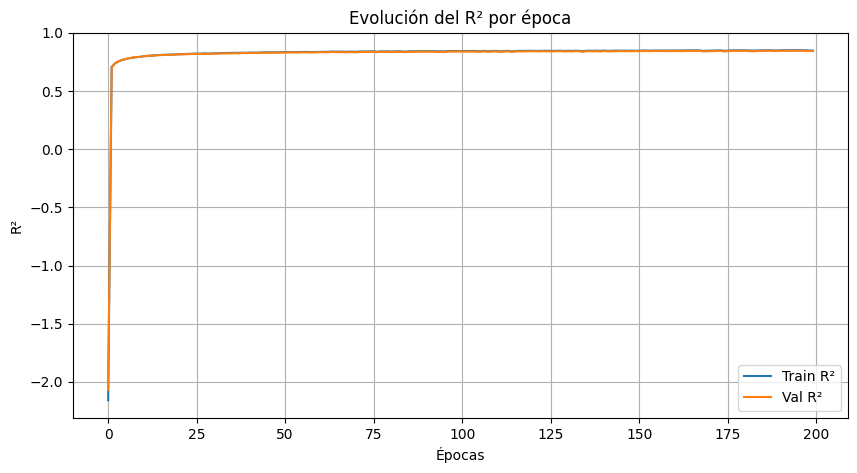

In [88]:
plt.figure(figsize=(10,5))
plt.plot(hist_train_r2, label='Train R²')
plt.plot(hist_val_r2, label='Val R²')
plt.title("Evolución del R² por época")
plt.xlabel("Épocas")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()


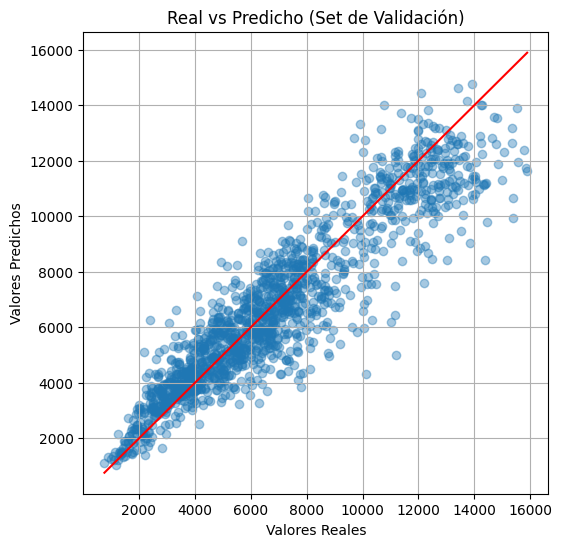

In [89]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_test_pred, alpha=0.4)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Real vs Predicho (Set de Validación)")
plt.grid(True)

# Línea ideal
min_val = min(min(y_test_real), min(y_test_pred))
max_val = max(max(y_test_real), max(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


### 2d) Conclusiones finales (0.5 puntos)
Redactar de manera detallada las conclusiones finales y si se cumplió con el objetivo o no.

En este trabajo el objetivo era construir un modelo capaz de predecir el gasto promedio de los clientes. Después de limpiar bien el dataset, crear variables nuevas y corregir problemas como outliers y fuga de información, el modelo empezó a aprender de manera coherente. El MLP final logró un R² de 0.84 en train y 0.83 en test, con un gap mínimo entre ambos, lo que muestra que generaliza bien y no está sobreajustado.

Al principio el desempeño era muy bajo, y eso me obligó a revisar todo el proceso, entender qué faltaba y ajustar las variables. Esa parte fue clave, porque el modelo recién mejoró cuando el dataset tuvo información realmente útil.

En resumen, sí se cumplió el objetivo: el modelo predice con buena precisión, supera ampliamente el mínimo requerido y se comporta estable en validación. Además, el proceso sirvió para entender cómo afectan las variables, cómo detectar problemas y cómo iterar hasta llegar a una solución sólida.